# CONFIG

In [1018]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import json
import time
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import NaN
df = pd.read_csv("60k.csv")

# TEST DATASET

    - Replace -1 by NaN
    - Remove NaN for essential features
    - Remove duplicates

In [1019]:
df = df.replace(-1, NaN)

In [1020]:
df.dropna(subset='price', inplace = True)
df.dropna(subset='number_of_bedrooms', inplace = True)
df.dropna(subset='surface', inplace = True)
df.drop(df.index[df['type_of_sale'] != 'residential_sale'], inplace=True)
df.drop(df.index[df['subtype_of_property'] == 'APARTMENT_BLOCK'], inplace=True)
del df["type_of_sale"]

# Treat catgorical data

In [1021]:
print(df["state_of_the_building"].unique())
percent_missing = df["state_of_the_building"].eq('NO_INFO').sum() * 100 / len(df["state_of_the_building"])
percent_missing


['TO_RENOVATE' 'GOOD' 'AS_NEW' 'NO_INFO' 'TO_BE_DONE_UP' 'JUST_RENOVATED'
 'TO_RESTORE']


26.851501785339213

/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_11035/662275904.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_histo = df[["price", "state_of_the_building"]][df["price"]<600000][df["price"]>0]


<AxesSubplot: xlabel='price', ylabel='Count'>

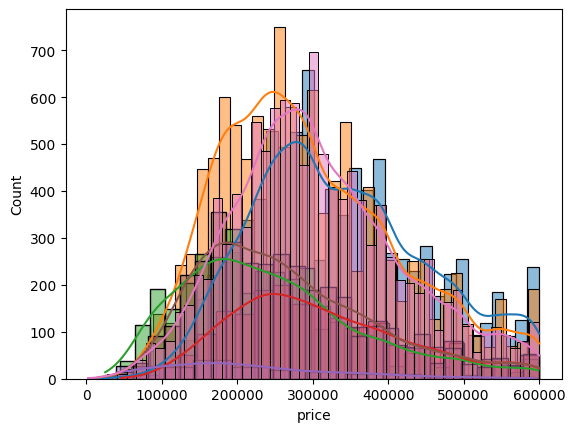

In [1022]:

df_histo = df[["price", "state_of_the_building"]][df["price"]<600000][df["price"]>0]
df_histo1 = df_histo[df_histo.state_of_the_building == 'AS_NEW']
sb.histplot(df_histo1['price'], kde = True, label='AS_NEW')
df_histo2 = df_histo[df_histo.state_of_the_building == 'GOOD']
sb.histplot(df_histo2['price'], kde = True, label='GOOD')
df_histo3 = df_histo[df_histo.state_of_the_building == 'TO_RENOVATE']
sb.histplot(df_histo3['price'], kde = True, label='TO_RENOVATE')
df_histo4 = df_histo[df_histo.state_of_the_building == 'JUST_RENOVATED']
sb.histplot(df_histo4['price'], kde = True, label='JUST_RENOVATED')
df_histo5 = df_histo[df_histo.state_of_the_building == 'TO_RESTORE']
sb.histplot(df_histo5['price'], kde = True, label='TO_RESTORE')
df_histo6 = df_histo[df_histo.state_of_the_building == 'TO_BE_DONE_UP']
sb.histplot(df_histo6['price'], kde = True, label='TO_BE_DONE_UP')
df_histo7 = df_histo[df_histo.state_of_the_building == 'NO_INFO']
sb.histplot(df_histo7['price'], kde = True, label='NO_INFO')


In [1023]:
#Translate categories into numerical values
#TYPE OF PROPERTY
map_property = {"HOUSE":1, "APARTMENT":0}
df["type_of_property"] = df["type_of_property"].map(map_property).astype(int)
#df["type_of_property"].value_counts

#STATE OF THE BUILDING
map_state = {"GOOD":1, "TO_RENOVATE":0, "AS_NEW":1, "JUST_RENOVATED":1, "TO_RESTORE":0, "NO_INFO":1, "TO_BE_DONE_UP":1}
df["state_of_the_building"] = df["state_of_the_building"].map(map_state).astype(int)
df["state_of_the_building"].value_counts()


1    43541
0     4069
Name: state_of_the_building, dtype: int64

# TRAIN DATASET

- Drop column w.o. price correlation

In [1024]:
df_train = df

In [1025]:
del df_train["Unnamed: 0"]
del df_train["id"]
del df_train["postal_code"]
del df_train["locality"]
del df_train["fully_equipped_kitchen"]
del df_train["kitchen_type"]
del df_train["land_surface"]
del df_train["number_of_facades"]
del df_train["garden_surface"]
del df_train["terrace_surface"]
del df_train["furnished"]
del df_train["open_fire"]
del df_train["region"]
del df_train["province"]
del df_train["subtype_of_property"]

- Replace NaN by 0 for selected features

In [1026]:
df_train["swimming_pool"] = df_train["swimming_pool"].replace(NaN, 0).astype(int)
df_train["garden"] = df_train["garden"].replace(NaN, 0).astype(int)
df_train["terrace"] = df_train["terrace"].replace(NaN, 0).astype(int)

# print(df["swimming_pool"].unique())
# print(df["garden"].unique())
# print(df["terrace"].unique())

- Drop some tricky data in selected features

In [1027]:
df_train.drop(df_train.index[df_train['type_of_property'] == 'HOUSE_GROUP'], inplace=True)
df_train.drop(df_train.index[df_train['type_of_property'] == 'APARTMENT_GROUP'], inplace=True)

# df_train.isnull().sum()
print(df_train["price"].mean())
print(df_train["price"].std())
df_train["price"].max()

415982.63600084017
435939.9323826184


15000000.0

- Remove outliers for price and surface

In [1028]:
#Dropping the outlier rows with standard deviation
factor = 2
upper_lim = df_train['price'].mean() + df_train['price'].std() * factor
df_train = df_train[(df_train['price'] < upper_lim) & (df_train['price'] >= 20000)]

factor = 2
upper_lim1 = df_train['surface'].mean() + df_train['surface'].std() * factor
lower_lim1 = df_train['surface'].mean() - df_train['surface'].std() * factor
df_train = df_train[(df_train['surface'] < upper_lim1) & (df_train['surface'] > lower_lim1)]

factor = 2
upper_lim2 = df_train['number_of_bedrooms'].mean() + df_train['number_of_bedrooms'].std() * factor
lower_lim2 = df_train['number_of_bedrooms'].mean() - df_train['number_of_bedrooms'].std() * factor
df_train = df_train[(df_train['number_of_bedrooms'] < upper_lim2) & (df_train['number_of_bedrooms'] > lower_lim2)]

<AxesSubplot: xlabel='surface', ylabel='price'>

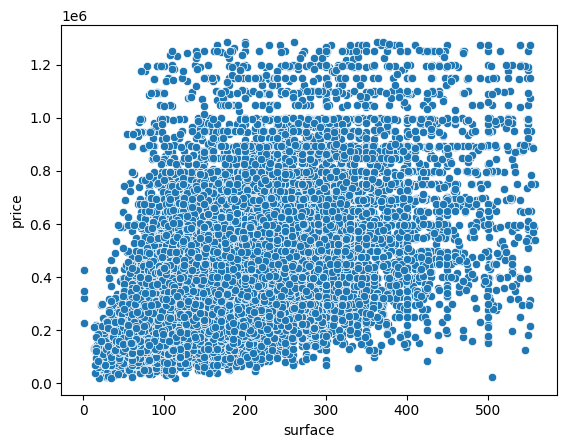

In [1029]:
sb.scatterplot(data=df_train, x = "surface", y = "price")

<AxesSubplot: >

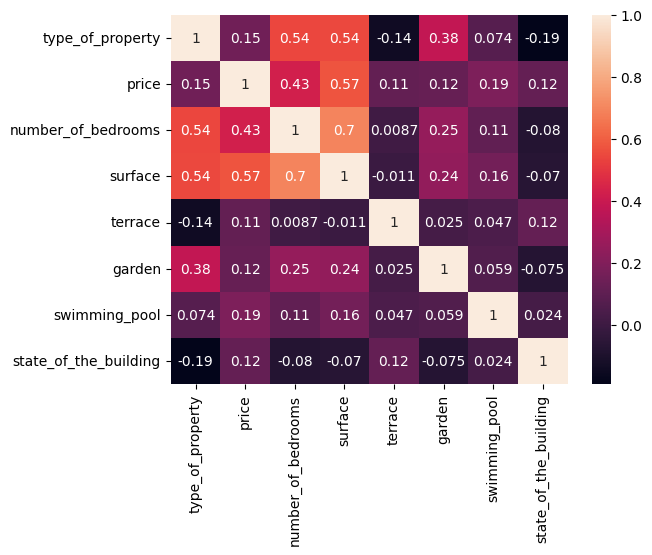

In [1030]:
#del df["id"]
Var_Corr = df_train.corr()
# plot the heatmap and annotation on it
sb.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [1031]:
df_train.to_csv("trained_dataset.csv")